# Doğuş Datathon - Zingat / Coderspace

In [1]:
import pandas as pd
import numpy as np
from pandas import Timestamp
from ggplot import *
import pandas
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

train = pd.read_csv("Adsızz.csv")
real_test = pd.read_csv("real_test2.csv")

train.iloc[:,[0,1]].head()
for col in train.columns:
    print(col)


In [2]:
train.describe(include='all')
real_test.describe(include='all')

,path,guncel_fiyat,odasayisi,brutmkare,netmkare,emlaktipi,binayasi,bulundugukat,binadakikatsayisi,isitmatipi,...,otopark,Interkom,depremyonetmeligineuygun,asansor,cocukoyunalani,giyinmeodasi,ebeveynbanyosu,tarih,emlak,konut_satis
count,64573,6.457300e+04,64535,64573.000000,64573.000000,64573,62123,60069,61569,61833,...,29405,64573,64573,64573,64573,64573,64573,64573,6240.000000,6240.000000
unique,828,NaN,37,NaN,NaN,9,14,34,12,16,...,7,2,2,2,2,2,2,475,NaN,NaN
top,Istanbul/Beylikduzu/Cumhuriyet,NaN,3+1,NaN,NaN,Daire,0,2,5,Kombi (Dogalgaz),...,Var,YOK,YOK,VAR,YOK,YOK,YOK,2020-03-16,NaN,NaN
freq,5715,NaN,25116,NaN,NaN,56263,28090,10587,13354,36067,...,13888,36625,50870,32634,56012,55838,43745,451,NaN,NaN
mean,NaN,9.777999e+05,NaN,185.902328,127.894027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.506378,9133.544231
std,NaN,5.094148e+06,NaN,2671.847842,765.582879,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.765540,4913.440128
min,NaN,1.720000e+02,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.700000,3795.000000
25%,NaN,2.400000e+05,NaN,100.000000,90.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.200000,3795.000000
50%,NaN,3.800000e+05,NaN,125.000000,110.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.200000,13455.000000
75%,NaN,7.500000e+05,NaN,155.000000,135.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,13455.000000


# Data Preprocessing
Data Cleaning

In [153]:
#Binning Categorical Features 

train.path = train.path.apply(lambda x: 'Istanbul' if 'Istanbul' in x else x)    
train.path = train.path.apply(lambda x: 'Izmir' if 'Izmir' in x else x) 

counts = train["path"].value_counts()
percent = train["path"].value_counts(normalize=True)
percent100 = train["path"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

#Binning Categorical Features

real_test.path = real_test.path.apply(lambda x: 'Istanbul' if 'Istanbul' in x else x)    
real_test.path = real_test.path.apply(lambda x: 'Izmir' if 'Izmir' in x else x) 

counts = real_test["path"].value_counts()
percent = real_test["path"].value_counts(normalize=True)
percent100 = real_test["path"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
Izmir,18480,0.526091,52.6%
Istanbul,16647,0.473909,47.4%


In [4]:
tarih_epoch = pd.to_datetime(train['tarih']) - pd.datetime(2018, 1, 1)
train['tarih'] = tarih_epoch.dt.days

tarih_epoch = pd.to_datetime(real_test['tarih']) - pd.datetime(2018, 1, 1)
real_test['tarih'] = tarih_epoch.dt.days

<ipython-input-4-001751974bc3>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  tarih_epoch = pd.to_datetime(train['tarih']) - pd.datetime(2018, 1, 1)
<ipython-input-4-001751974bc3>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  tarih_epoch = pd.to_datetime(real_test['tarih']) - pd.datetime(2018, 1, 1)


Missing Value Imputation

In [115]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

nulls2 = pd.DataFrame(real_test.isnull().sum().sort_values(ascending=False)[:25])
nulls2.columns = ['Null Count']
nulls2.index.name = 'Feature'
nulls2

,Null Count
Feature,
guncel_fiyat,35127
odasayisi,0
konut_satis,0
emlak,0
tarih,0
ebeveynbanyosu,0
giyinmeodasi,0
cocukoyunalani,0
asansor,0


In [2]:
del train["manzara"]
del train["otopark"]
train = train.fillna(train.mode().iloc[0])                 #Replace missing values with the most frequent value
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls


del real_test["manzara"]
del real_test["otopark"]
real_test = real_test.fillna(real_test.mode().iloc[0])      #Replace missing values with the most frequent value
nulls2 = pd.DataFrame(real_test.isnull().sum().sort_values(ascending=False)[:25])
nulls2.columns = ['Null Count']
nulls2.index.name = 'Feature'
#nulls2

Removing and Handling Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


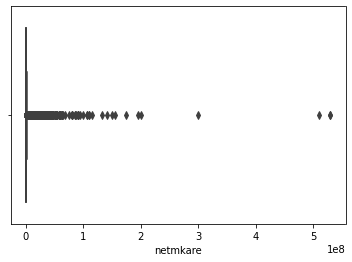

In [3]:
num_train = train._get_numeric_data()
num_train.columns
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_train.apply(lambda x: var_summary(x)).T

sns.boxplot(train['guncel_fiyat']) 
sns.boxplot(train['brutmkare']) 
sns.boxplot(train['netmkare']) 
train['guncel_fiyat']= train['guncel_fiyat'].clip(upper=train['guncel_fiyat'].quantile(0.99)) 
train['brutmkare']= train['brutmkare'].clip(upper=train['brutmkare'].quantile(0.99)) 
train['netmkare']= train['netmkare'].clip(upper=train['netmkare'].quantile(0.99)) 

Categorical Encoding

In [5]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['path'] = labelencoder.fit_transform(train['path'])
train['emlaktipi'] = labelencoder.fit_transform(train['emlaktipi'])
train['isitmatipi'] = labelencoder.fit_transform(train['isitmatipi'])
real_test['path'] = labelencoder.fit_transform(real_test['path'])
real_test['emlaktipi'] = labelencoder.fit_transform(real_test['emlaktipi'])
real_test['isitmatipi'] = labelencoder.fit_transform(real_test['isitmatipi'])

le_enc = preprocessing.LabelEncoder()
le_enc = le_enc.fit(train["odasayisi"])
le_enc.classes_ = np.array(["1+0","1+1","2+0","2+1","2+2","3+1","3+2","4+1","4+2","4+3","4+4","5+1","5+2","5+3","6+1","6+2",
                            "6+3","7+1","7+2","7+3","8+1","8+2","8+3","8+4","9+1","9+2","9+3","9+4","10+0","10+1","10+2",
                            "10+3","10+4","1149+0","11+3","12+2","19+4","19+6"])
train["odasayisi"] = le_enc.transform(train["odasayisi"])
le_enc = preprocessing.LabelEncoder()
le_enc.classes_ = np.array(["1+0","1+1","2+0","2+1","2+2","3+1","3+2","4+1","4+2","4+3","4+4","5+1","5+2","5+3","6+1","6+2",
                            "6+3","7+1","7+2","7+3","8+1","8+2","8+3","8+4","9+1","9+2","9+3","9+4","10+0","10+1","10+2",
                            "10+3","10+4","1149+0","11+3","12+2","19+4","19+6"])
le_enc = le_enc.fit(real_test["odasayisi"])
real_test["odasayisi"] = le_enc.transform(real_test["odasayisi"])

#Find and Replace
preserved_mapper = {"bulundugukat": {'Kot 4':1 ,'Kot 3':1,'Kot 2':1,'Kot 1':1,'Bodrum Kat':1,'Zemin Kat':2,'Giris Kati':2,
                    'Bahce kati':2,'Yuksek Giris': 2,'Mustakil':2 ,'Komple':2, '1':3,'2':4,'3':5,'4':6,'5': 7, '6': 8,
                    '7': 9,'8': 10,'9': 11,'10': 12,'11': 13,'12': 14,'13': 15,'14': 16,'15': 17,'16': 18,'17': 19,'18': 20,
                    '19': 21,'20': 22,'20 ve uzeri': 23,'cati Kati': 24,'En ust Kat': 24,'Teras Kat': 24}}     
train = train.replace(preserved_mapper)  
real_test = real_test.replace(preserved_mapper)

preserved_mapper = {"binadakikatsayisi": {'1':1,'2':2,'3':3,'4':4,'5': 5, '6': 6, '7': 7,'8': 8,'9': 9,'10': 10,
                                          '10-20 arasi': 15,'20 ve uzeri': 25}}     
train = train.replace(preserved_mapper) 
real_test = real_test.replace(preserved_mapper)

preserved_mapper = {"binayasi": {'0':0,'1':1,'2':2,'3':3,'4':4,'5': 5,'6-10 arasi':8,'11-15 arasi':13,'16-20 arasi':18,
                                 '21-25 arasi':23,'26-30 arasi':28,'31-35 arasi':33,'36-40 arasi':38,'40 ve uzeri':45}}     
train = train.replace(preserved_mapper)
train.head() 
real_test = real_test.replace(preserved_mapper)
real_test.head()


,path,odasayisi,brutmkare,netmkare,emlaktipi,binayasi,bulundugukat,binadakikatsayisi,isitmatipi,banyosayisi,Interkom,depremyonetmeligineuygun,asansor,cocukoyunalani,giyinmeodasi,ebeveynbanyosu,tarih,emlak,konut_satis,guncel_fiyat
0,450,13,165,155,0,33,8,7,8,1.0,YOK,YOK,YOK,YOK,VAR,YOK,840,133.5,2533,NaN
1,731,9,130,120,0,8,4,2,7,1.0,YOK,YOK,YOK,YOK,YOK,YOK,840,133.5,2533,NaN
2,403,11,182,153,0,0,9,15,14,2.0,YOK,YOK,YOK,YOK,YOK,YOK,840,133.5,2533,NaN
3,731,9,130,120,0,8,4,2,7,1.0,YOK,YOK,YOK,YOK,YOK,YOK,840,133.5,2533,NaN
4,52,11,125,120,0,0,8,6,8,1.0,VAR,VAR,VAR,VAR,VAR,VAR,840,113.1,6113,NaN


In [253]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"emlaktipi")
real_test= create_dummies(train,"emlaktipi")
train = create_dummies(train,"path")
real_test= create_dummies(train,"path")

del train["emlaktipi"]
del train["path"]
del real_test["emlaktipi"]
del real_test["path"]

train.head()

,guncel_fiyat,odasayisi,brutmkare,netmkare,binayasi,bulundugukat,binadakikatsayisi,isitmatipi,banyosayisi,Interkom,...,path_Izmir/odemis/Ovakent,path_Izmir/odemis/Sekikoy,path_Izmir/odemis/Suleyman Demirel,path_Izmir/odemis/Turkmen,path_Izmir/odemis/Umurbey,path_Izmir/odemis/Yenicekoy,path_Izmir/odemis/Yenikoy,path_Izmir/odemis/Zafer,path_Izmir/odemis/sirinkoy,path_Izmir/odemis/uc Eylul
0,1050000.0,12,380,370,18,14,15,8,3.0,1,...,0,0,0,0,0,0,0,0,0,0
1,547500.0,3,65,55,0,3,7,8,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,440000.0,5,205,197,13,4,15,8,2.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1450000.0,5,150,130,28,5,5,11,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,169000.0,3,70,65,1,1,6,8,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def encode(x):
 return 0 if x == 'YOK' else 1
train['Interkom'] = train["Interkom"].apply(encode)
real_test['Interkom'] = real_test["Interkom"].apply(encode)
def encode(x):
 return 0 if x == 'YOK' else 1
train['depremyonetmeligineuygun'] = train["depremyonetmeligineuygun"].apply(encode)
real_test['depremyonetmeligineuygun'] = real_test["depremyonetmeligineuygun"].apply(encode)
def encode(x):
 return 0 if x == 'YOK' else 1
train['asansor'] = train["asansor"].apply(encode)
real_test['asansor'] = real_test["asansor"].apply(encode)
def encode(x):
 return 0 if x == 'YOK' else 1
train['cocukoyunalani'] = train["cocukoyunalani"].apply(encode)
real_test['cocukoyunalani'] = real_test["cocukoyunalani"].apply(encode)
def encode(x):
 return 0 if x == 'YOK' else 1
train['giyinmeodasi'] = train["giyinmeodasi"].apply(encode)
real_test['giyinmeodasi'] = real_test["giyinmeodasi"].apply(encode)
def encode(x):
 return 0 if x == 'YOK' else 1
train['ebeveynbanyosu'] = train.ebeveynbanyosu.apply(encode)
real_test['ebeveynbanyosu'] = real_test.ebeveynbanyosu.apply(encode)

# Data Visualization

In [210]:
pd.crosstab(index=train["brutmkare"],columns="count")

col_0,count
brutmkare,
1.00,8
2.00,1
3.00,1
5.00,1
9.00,6
...,...
552.00,2
553.00,2
556.00,1


In [283]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.describe()


,path,odasayisi,brutmkare,netmkare,emlaktipi,binayasi,bulundugukat,binadakikatsayisi,isitmatipi,banyosayisi,Interkom,depremyonetmeligineuygun,asansor,cocukoyunalani,giyinmeodasi,ebeveynbanyosu,tarih,emlak,konut_satis,guncel_fiyat
0,450,13,165,155,0,33,8,7,8,1.0,0,0,0,0,1,0,840,133.5,2533,NaN
1,731,9,130,120,0,8,4,2,7,1.0,0,0,0,0,0,0,840,133.5,2533,NaN
2,403,11,182,153,0,0,9,15,14,2.0,0,0,0,0,0,0,840,133.5,2533,NaN
3,731,9,130,120,0,8,4,2,7,1.0,0,0,0,0,0,0,840,133.5,2533,NaN
4,52,11,125,120,0,0,8,6,8,1.0,1,1,1,1,1,1,840,113.1,6113,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35122,651,13,200,180,5,13,2,3,7,2.0,0,0,0,0,0,0,1095,161.8,5794,NaN
35123,6,9,85,65,0,23,2,5,8,1.0,0,0,0,0,0,0,1095,135.2,20236,NaN
35124,563,11,125,120,0,2,4,4,8,2.0,0,0,1,0,0,0,1095,161.8,5794,NaN
35125,287,23,427,245,2,45,2,2,12,1.0,0,0,0,0,0,0,1095,161.8,5794,NaN


In [280]:
quality_pivot = train.pivot_table(index='banyosayisi',
                  values='guncel_fiyat', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('banyosayisi')
plt.ylabel('guncel_fiyat')
plt.xticks(rotation=0)
plt.show()
#Notice that the median sales price strictly increases as Overall Quality increases.
plt.scatter(x=train['netmkare'], y=train['guncel_fiyat'])
plt.ylabel('guncel_fiyat')
plt.xlabel('netmkare')
plt.show()

train = train[train['netmkare'] < 120000] #We will create a new dataframe with some outliers removed.
plt.scatter(x=train['netmkare'], y=np.log(train["guncel_fiyat"]))
plt.xlim(-100,8000) # This forces the same scale as before
plt.ylabel("guncel_fiyat")
plt.xlabel('netmkare')
plt.show()

,path,odasayisi,brutmkare,netmkare,emlaktipi,binayasi,bulundugukat,binadakikatsayisi,isitmatipi,banyosayisi,Interkom,depremyonetmeligineuygun,asansor,cocukoyunalani,giyinmeodasi,ebeveynbanyosu,tarih,emlak,konut_satis,guncel_fiyat
0,450,13,165,155,0,33,8,7,8,1.0,0,0,0,0,1,0,840,133.5,2533,NaN
1,731,9,130,120,0,8,4,2,7,1.0,0,0,0,0,0,0,840,133.5,2533,NaN
2,403,11,182,153,0,0,9,15,14,2.0,0,0,0,0,0,0,840,133.5,2533,NaN
3,731,9,130,120,0,8,4,2,7,1.0,0,0,0,0,0,0,840,133.5,2533,NaN
4,52,11,125,120,0,0,8,6,8,1.0,1,1,1,1,1,1,840,113.1,6113,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35122,651,13,200,180,5,13,2,3,7,2.0,0,0,0,0,0,0,1095,161.8,5794,NaN
35123,6,9,85,65,0,23,2,5,8,1.0,0,0,0,0,0,0,1095,135.2,20236,NaN
35124,563,11,125,120,0,2,4,4,8,2.0,0,0,1,0,0,0,1095,161.8,5794,NaN
35125,287,23,427,245,2,45,2,2,12,1.0,0,0,0,0,0,0,1095,161.8,5794,NaN


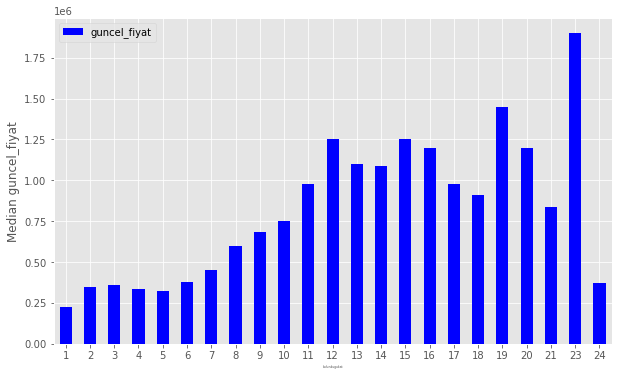

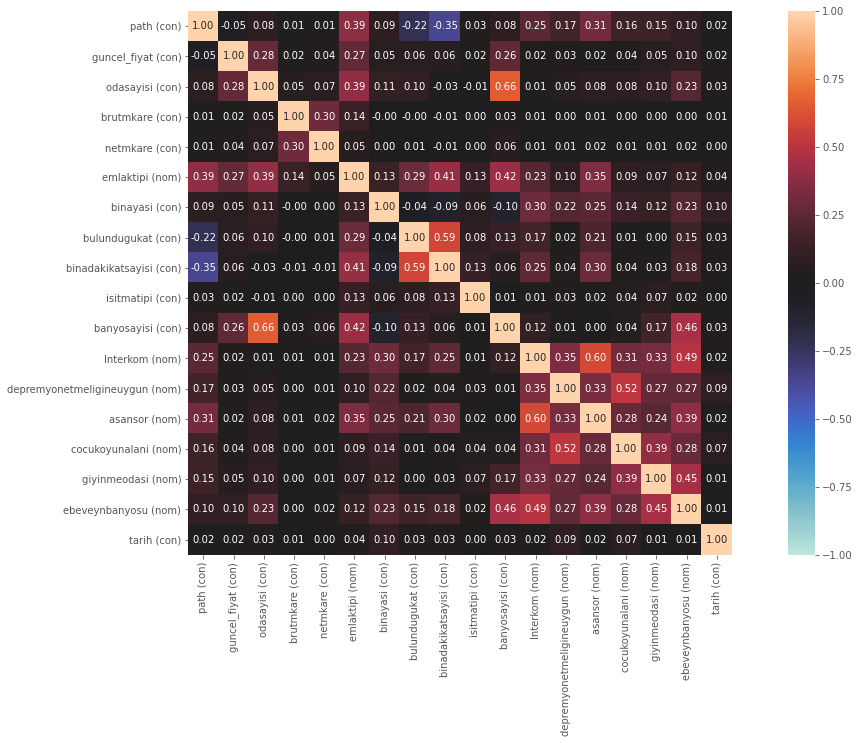

{'corr':                                 path (con)  guncel_fiyat (con)  \
 path (con)                        1.000000           -0.048441   
 guncel_fiyat (con)               -0.048441            1.000000   
 odasayisi (con)                   0.081570            0.280458   
 brutmkare (con)                   0.007911            0.021487   
 netmkare (con)                    0.013440            0.038065   
 emlaktipi (nom)                   0.389109            0.265946   
 binayasi (con)                    0.087372            0.052678   
 bulundugukat (con)               -0.222478            0.063410   
 binadakikatsayisi (con)          -0.353914            0.058484   
 isitmatipi (con)                  0.030811            0.017217   
 banyosayisi (con)                 0.083996            0.264991   
 Interkom (nom)                    0.247326            0.024542   
 depremyonetmeligineuygun (nom)    0.165172            0.030164   
 asansor (nom)                     0.312532           

In [159]:
condition_pivot = train.pivot_table(index='bulundugukat', values='guncel_fiyat', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('bulundugukat',fontsize=3)
plt.ylabel('Median guncel_fiyat')
plt.xticks(rotation=0)
plt.show()

Correlation Plot

In [92]:
k = 14
cols = num_corr.nlargest(k, 'guncel_fiyat')['guncel_fiyat'].index
cm = np.corrcoef(num_train[cols].values.T)
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(cm, annot = True,vmax =.8, yticklabels=cols.values, xticklabels = cols.values)

,brutmkare,netmkare,banyosayisi,tarih,emlak,konut_satis,guncel_fiyat
0,165,155,1.0,840,133.5,2533,NaN
1,130,120,1.0,840,133.5,2533,NaN
2,182,153,2.0,840,133.5,2533,NaN
3,130,120,1.0,840,133.5,2533,NaN
4,125,120,1.0,840,113.1,6113,NaN
...,...,...,...,...,...,...,...
35122,200,180,2.0,1095,161.8,5794,NaN
35123,85,65,1.0,1095,135.2,20236,NaN
35124,125,120,2.0,1095,161.8,5794,NaN
35125,427,245,1.0,1095,161.8,5794,NaN


# Checking Normality

Skew is: 60.384206660392145


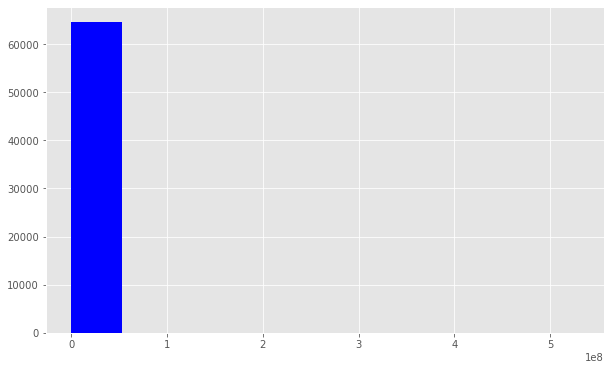

Skew is: 0.8413954683421218


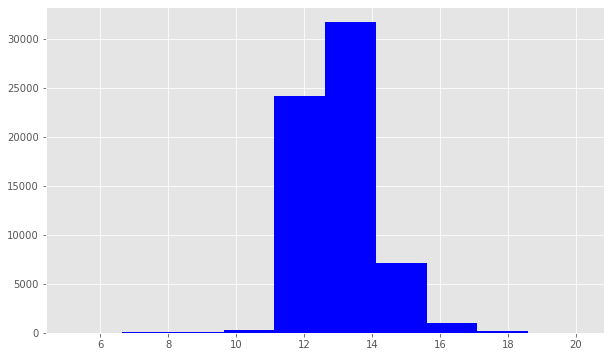

-0.12002604221937907


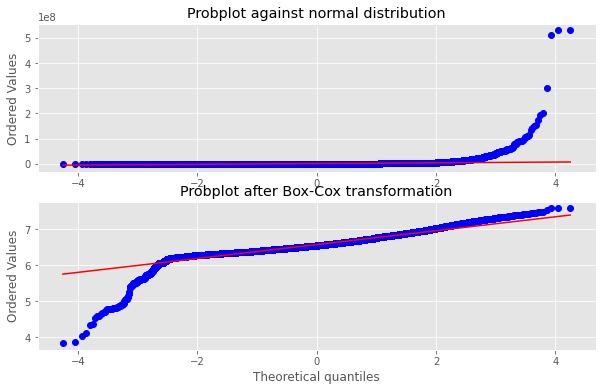

In [81]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
print ("Skew is:", train["guncel_fiyat"].skew())
plt.hist(train["guncel_fiyat"], color='blue')
plt.show()
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = (train["guncel_fiyat"])
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:title={'center':'Log Normal'}, xlabel='guncel_fiyat'>

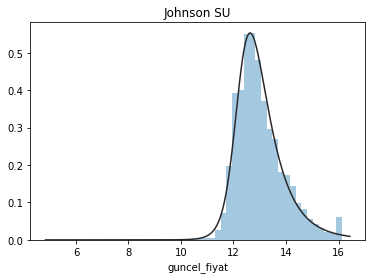

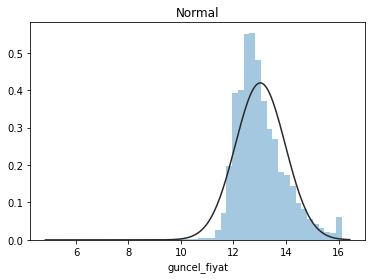

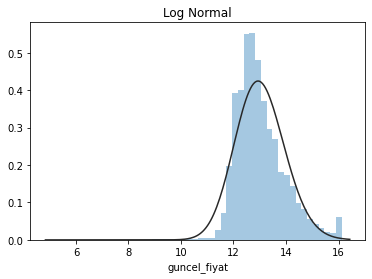

In [14]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y =np.log(train['guncel_fiyat'])
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

# Handling Multi-Collinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]
calculate_vif_(train[features])


dropping 'emlak' at index: 17
dropping 'netmkare' at index: 3
dropping 'konut_satis' at index: 16
dropping 'banyosayisi' at index: 8
dropping 'tarih' at index: 14
dropping 'brutmkare' at index: 2
Remaining variables:
Index(['path', 'odasayisi', 'emlaktipi', 'binayasi', 'bulundugukat',
       'binadakikatsayisi', 'isitmatipi', 'Interkom',
       'depremyonetmeligineuygun', 'asansor', 'cocukoyunalani', 'giyinmeodasi',
       'ebeveynbanyosu'],
      dtype='object')


,path,odasayisi,emlaktipi,binayasi,bulundugukat,binadakikatsayisi,isitmatipi,Interkom,depremyonetmeligineuygun,asansor,cocukoyunalani,giyinmeodasi,ebeveynbanyosu
0,45,12,0,18,14,15,8,1,1,1,1,1,1
1,63,3,0,0,3,7,8,1,0,1,0,0,0
2,45,5,0,13,4,15,8,1,1,1,0,0,1
3,38,5,0,28,5,5,11,0,0,1,0,0,1
4,49,3,0,1,1,6,8,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64568,615,5,7,0,2,3,7,0,1,0,0,0,0
64569,393,5,0,8,4,4,4,0,1,0,0,0,0
64570,615,5,5,0,2,3,7,0,1,0,0,0,0
64571,425,5,0,0,3,6,9,0,1,0,1,1,1


In [19]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
vif_X = train[features]
calc_vif(vif_X)
vif_X = train.drop(['netmkare','isitmatipi','guncel_fiyat','banyosayisi','emlak','tarih'], axis=1)
calc_vif(vif_X)



,variables,VIF
0,path,2.421336
1,odasayisi,8.761480
2,brutmkare,10.536197
3,emlaktipi,1.627169
4,binayasi,1.666617
5,bulundugukat,4.780104
6,binadakikatsayisi,5.426347
7,Interkom,3.349519
8,depremyonetmeligineuygun,1.904254
9,asansor,3.689703


In [ ]:
train = train.drop(['netmkare','isitmatipi','guncel_fiyat','banyosayisi','emlak','tarih'], axis=1)
real_test = real_test.drop(['netmkare','isitmatipi','guncel_fiyat','banyosayisi','emlak','tarih'], axis=1)
train.reset_index(drop=True, inplace=True)
real_test.reset_index(drop=True, inplace=True)

# Forecasting

In [21]:
train["guncel_fiyat"] = np.log1p(train["guncel_fiyat"])               #normalization
y = train['guncel_fiyat'].reset_index(drop=True)
X_train = train.drop(['guncel_fiyat'], axis=1)
X_test = real_test.drop(['guncel_fiyat'], axis=1)

,path,odasayisi,brutmkare,emlaktipi,binayasi,bulundugukat,binadakikatsayisi,Interkom,depremyonetmeligineuygun,asansor,cocukoyunalani,giyinmeodasi,ebeveynbanyosu,konut_satis,netmkare,isitmatipi,banyosayisi,tarih,emlak
0,45,12,380.0,0,18,14,15,1,1,1,1,1,1,13455.0,NaN,NaN,NaN,NaN,NaN
1,63,3,65.0,0,0,3,7,1,0,1,0,0,0,13455.0,NaN,NaN,NaN,NaN,NaN
2,45,5,205.0,0,13,4,15,1,1,1,0,0,1,13455.0,NaN,NaN,NaN,NaN,NaN
3,38,5,150.0,0,28,5,5,0,0,1,0,0,1,13455.0,NaN,NaN,NaN,NaN,NaN
4,49,3,70.0,0,1,1,6,1,0,1,0,1,1,13455.0,NaN,NaN,NaN,NaN,NaN


In [23]:
overfit = []                                                          #overfitting
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X_train.drop(overfit, axis=1)
X_test = X_test.drop(overfit, axis=1)

In [24]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42) 

xgboost = XGBRegressor(learning_rate=0.1,n_estimators=1000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [18]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("lasso: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

0        13.864301
1        13.213118
2        12.994530
3        14.187074
4        12.037654
           ...    
64568    13.579788
64569    12.736701
64570    13.337475
64571    13.527828
64572    12.429216
Name: guncel_fiyat, Length: 64568, dtype: float64

In [26]:
print('rf')
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_model_full_data = rf_reg.fit(X, y)

print('ridge')
ridge_model_full_data = ridge.fit(X, y)

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

rf
ridge
elasticnet
Lasso
GradientBoosting
xgboost
[06:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
print('RMSLE score on train data:')
print(rmsle(y, rf_model_full_data.predict(X)))                 # best prediction
print('RMSLE score on train data:')
print(rmsle(y, ridge_model_full_data.predict(X)))
print('RMSLE score on train data:')
print(rmsle(y, elastic_model_full_data.predict(X)))
print('RMSLE score on train data:')
print(rmsle(y, gbr_model_full_data.predict(X)))
print('RMSLE score on train data:')
print(rmsle(y, xgb_model_full_data.predict(X)))

RMSLE score on train data:
0.14849453538234128


In [33]:
np.floor(np.expm1(rf_model_full_data.predict(X_test))).head()